<a href="https://colab.research.google.com/github/WillHK/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
import matplotlib.pyplot as plt

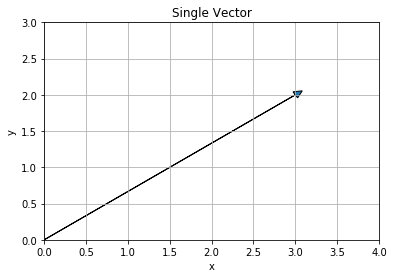

In [3]:
vector_a = np.array([3,2])
fig, ax = plt.subplots()
ax.set_xlim((0,4))
ax.set_ylim((0,3))
ax.grid()
plt.arrow(0,0,vector_a[0], vector_a[1], head_width=.1, head_length=.1)
plt.title('Single Vector')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [4]:
# The norm of a vector represents it's magnitude or length

vector_b = np.array([17, -4, -2, 1])

vect_b_mag = (vector_b[0]**2 + vector_b[1]**2 + vector_b[2]**2 + vector_b[3]**2)**.5

print("Vector B Magnitude: ", vect_b_mag)
print("Library verification of Vector B Magnitude: ", np.linalg.norm(vector_b))

Vector B Magnitude:  17.60681686165901
Library verification of Vector B Magnitude:  17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
vector_c = np.array([3,7,-2,12])
vector_d = np.array([9,-7,4,6])

print("Vectors C and D are orthogonal if their dot product equals 0: ", np.dot(vector_c, vector_d))
print("They are not orthogonal.")

Vectors C and D are orthogonal if their dot product equals 0:  42
They are not orthogonal.


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [6]:
matrix_e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
mat_e_inv = np.linalg.inv(matrix_e)
print("Matrix E inverse: ", mat_e_inv)

print("Matrix E transpose: ", matrix_e.T)

Matrix E inverse:  [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
Matrix E transpose:  [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [7]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

customers  snow
0        820     0
1        760     1
2       1250     7
3        990     1
4       1080     0

In [8]:
print("Mean value of customers: ", np.mean(df["customers"]))
print("Mean value of snow: ", np.mean(df["snow"]))
print("Variance of customers: ", df["customers"].var())
print("Variance of snow: ", df["snow"].var())
print("Std Dev of customers: ", np.std(df["customers"]))
print("Std Dev of snow: ", np.std(df["snow"]))

Mean value of customers:  1135.7142857142858
Mean value of snow:  2.7142857142857144
Variance of customers:  98761.90476190478
Variance of snow:  8.571428571428571
Std Dev of customers:  290.95199127087926
Std Dev of snow:  2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# No, they haven't been standardized yet so only the Standard Deviation is
# comparable between multiple features

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [10]:
cov_mat = np.cov(df["customers"], df["snow"])
print(cov_mat)
df.cov()

[[9.87619048e+04 6.70238095e+02]
 [6.70238095e+02 8.57142857e+00]]


customers        snow
customers  98761.904762  670.238095
snow         670.238095    8.571429

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [28]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data

#countries = {"England":0, "Wales": 1, "Scotland": 2, "North Ireland": 3}
#df.Country = [countries[item] for item in df.Country]
df.head()

Country  Cheese  ...  Alcoholic Drinks  Confectionery
0        England     105  ...               375             54
1          Wales     103  ...               475             64
2       Scotland     103  ...               458             62
3  North Ireland      66  ...               135             41

[4 rows x 18 columns]

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [0]:
df = df.drop('Country', axis=1)

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [34]:
scaler = StandardScaler()
scaler.fit(df)
transformed_data = scaler.transform(df)

pca = PCA(n_components=2)
pca.fit(transformed_data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
def create_pca(data, pca_cols):
  scaler = StandardScaler()
  scaler.fit(data)
  transformed_df = scaler.transform(data)
  pca = PCA(pca_cols)

  pca.fit(transformed_df)

  # Transpose column to make later usage easier
  return pca.transform(transformed_df).T

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


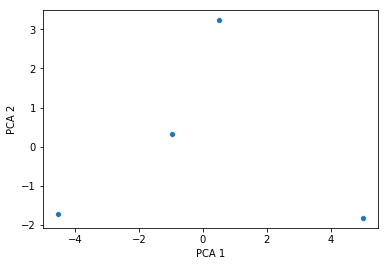

In [39]:
pca2d = create_pca(df, 2)
ax = sns.scatterplot(x=pca2d[0], y=pca2d[1])
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
plt.show()

#3D PCA visualization

In [0]:
# Enable animation and import libraries
from matplotlib import rc
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
rc('animation', html='jshtml')

# Expects a 3 row dataframe of numbers as data, a list of tuples for the xyz
# lims and a list of strings for labels
def animate_3d_scatter(data, xyzlims, labels):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  sns.set_style('white')
  # Animation function
  def animate(angle):
    # Clear axes
    ax.cla()
    # Apply settings to axes
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.set_xlim(xyzlims[0])
    ax.set_ylim(xyzlims[1])
    ax.set_zlim(xyzlims[2])
    # create plot
    ax.scatter(
      xs=data[0],
      ys=data[1], 
      zs=data[2],  
      cmap='tab10'
    )
    ax.view_init(45, angle)
    plt.draw()
  plt.close()
  # create animation object that contains new animation
  anim = animation.FuncAnimation(fig, animate, frames=range(0, 360, 2),
                                 repeat=True)
  return anim

In [42]:
pca3d = create_pca(df, 3)

animate_3d_scatter(pca3d, [(-5,5),(-5,5),(-5,5)],["pca1","pca2","pca3"])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


<Figure size 432x288 with 0 Axes>

# Analysis
The third PCA doesn't seem to add too much extra info, so two PCAs should be plenty to analyze this data fully.

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [43]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

x         y
0 -7.846803 -3.421277
1 -3.554323 -6.884729
2 -0.192822 -9.671030
3 -6.401456 -5.223972
4 -0.804026 -9.704457

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = pd.Series(kmeans.labels_)

points["clusters"] = labels.to_frame()
points.head()

x         y  clusters
0 -7.846803 -3.421277         0
1 -3.554323 -6.884729         4
2 -0.192822 -9.671030         2
3 -6.401456 -5.223972         0
4 -0.804026 -9.704457         2

In [0]:
def plot_clusters_and_centroids(points, column_header, centroids):
  colors = {0: 'red', 1:'green', 2:'yellow', 3: 'blue', 4: 'purple'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  ax.plot(centroids.iloc[4].x, centroids.iloc[4].y, "ok")
  plt.title("KMeans Clusters and Centroids")
  ax.set_xlabel("x")
  ax.set_ylabel("y")
#   sns.scatterplot(points['x'], points['y'], hue=points['clusters'])
  grouped = points.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()

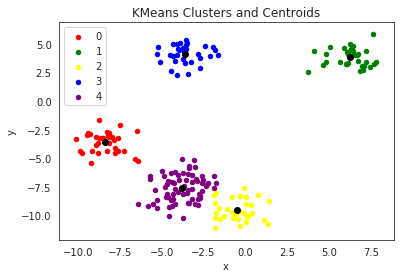

In [46]:
# Completed using functions from module 4
from scipy.spatial import distance

centroids = points.sample(5)

def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean(), df.x[df[column_header]==3].mean(), df.x[df[column_header]==4].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean(), df.y[df[column_header]==3].mean(), df.y[df[column_header]==4].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

def find_centroids(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = distance.cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
plot_clusters_and_centroids(find_centroids(points, centroids), 'clusters', get_centroids(points, "clusters"))

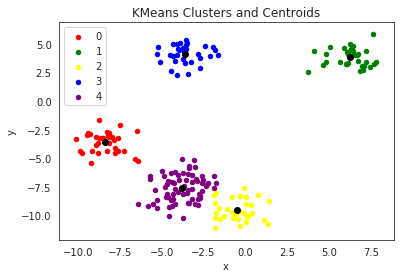

In [47]:
# Making my own centroid function

def recursive_find_centroids(df, centroids):
  prev_centroids = centroids.copy()
  df_temp = df.copy()
  
  centroids = get_centroids(df_temp, 'clusters')
  
  distances = distance.cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
  nearest_centroids = np.argmin(distances, axis=1)
  
  if(list(nearest_centroids) == list(prev_centroids)):
    df_temp['centroids'] = nearest_centroids
    return df_temp
  else:
    return recursive_find_centroids(df, nearest_centroids)
  
centroids = points.sample(3)
plot_clusters_and_centroids(recursive_find_centroids(points, centroids), 'clusters', get_centroids(points, "clusters"))

# Justifications
For this dataset I initially clustered it in 3 clusters but based on the visualization I decided having the datapoints near and below -x and -y being a single cluster didn't give enough diffentiation to what was a fairly spread out group.
With 5 clusters each cluster is distinct and shows the clear differentiation between them.